# Practical Lesson on Climate Data Analysis
### Matteo Mastropierro and Davide Zanchettin

- see xarray tutorial repo at: https://github.com/xarray-contrib/xarray-tutorial.git

Today, we'll discuss and learn the basics of Xarray data structures. By the
end of the lesson, we will be able to:

- Understand the basic data structures in Xarray
- Inspect `DataArray` and `Dataset` objects.
- Read and write netCDF files using Xarray.
- Subset on more dimensions
- Plot a simple map of Precipitation or Temperature
- Extract and plot a time-series from a single point


We'll start by reviewing the various components of the Xarray data model, represented here visually:

<img src="http://xarray.pydata.org/en/stable/_images/dataset-diagram.png" align="center" width="80%">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

#%matplotlib inline
#%config InlineBackend.figure_format='retina'

In [2]:
path = 'C:/Users/mastr/Documents/Climate Data Lesson_Oct 2022/tas_Amon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc'
ds = xr.load_dataset(path)
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds   (lon, bnds) float64 -0.625 0.625 0.625 ... 358.1 358.1 359.4
    tas        (time, lat, lon) float32 250.6 251.8 250.5 ... 260.5 260.5 260.5
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/db148e8f-76e1-424c-92e0-8f5abb588c13

In [3]:
# Clean the dataset
ds = ds.drop(["time_bnds","lat_bnds","lon_bnds"])
# ds['time'] = ds.indexes['time'].to_datetimeindex()


In [7]:
var = "tas"

## What's inside an Xarray Dataset?

A Dataset contains different DataArrays, that are variable values mapped onto 1,2,3 or 4 dimensions

In [8]:
ds[var]

<xarray.DataArray 'tas' (time: 1980, lat: 192, lon: 288)>
array([[[250.61404, 251.75047, 250.52225, ..., 252.56142, 251.47342,
         251.79126],
        [254.85008, 254.09615, 253.78973, ..., 254.03569, 253.87025,
         253.76013],
        [256.46744, 256.64685, 255.37962, ..., 256.3997 , 255.61328,
         256.78012],
        ...,
        [242.48535, 242.4923 , 242.49825, ..., 242.45024, 242.46492,
         242.47661],
        [242.31367, 242.31175, 242.30966, ..., 242.3185 , 242.31705,
         242.31544],
        [242.38223, 242.38135, 242.38092, ..., 242.38911, 242.38591,
         242.3837 ]],

       [[236.34727, 237.33249, 236.30054, ..., 237.68567, 237.16774,
         237.36662],
        [239.92738, 239.17188, 239.00414, ..., 239.1553 , 239.0252 ,
         238.92319],
        [240.41753, 240.37062, 239.55615, ..., 240.1856 , 239.6879 ,
         240.47493],
...
        [269.98575, 269.99625, 270.00586, ..., 269.9268 , 269.9517 ,
         269.97202],
        [270.1765 , 270.17908, 270.1819 , ..., 270.1701 , 270.17203,
         270.17416],
        [270.30298, 270.30362, 270.30426, ..., 270.30106, 270.30173,
         270.30234]],

       [[250.22421, 250.33122, 250.13512, ..., 250.29846, 250.73671,
         250.27077],
        [255.66652, 253.39455, 255.89824, ..., 253.34317, 253.45265,
         253.16135],
        [258.1754 , 258.03354, 258.20236, ..., 258.30255, 258.38666,
         258.20752],
        ...,
        [260.08542, 260.09125, 260.09604, ..., 260.03867, 260.05966,
         260.07605],
        [260.07614, 260.07715, 260.07825, ..., 260.0736 , 260.07437,
         260.0752 ],
        [260.50592, 260.50662, 260.50824, ..., 260.51108, 260.50784,
         260.50623]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  TREFHT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-12-21T16:04:10Z altered by CMOR: Treated scalar dime...

## What's in a DataArray? 

*data + (a lot of) metadata*


### Named dimensions 

`.dims` correspond to the axes of your data. 

In this case we have 2 spatial dimensions (`latitude` and `longitude` are stored with shorthand names `lat` and `lon`) and one spatial dimension (`time`).

In [9]:
ds[var].dims

('time', 'lat', 'lon')

### Coordinate variables 

`.coords` is a simple [data container](https://xarray.pydata.org/en/stable/data-structures.html#coordinates)
for coordinate variables.

Here we see the actual timestamps and spatial positions of our air temperature data:

In [10]:
ds[var].coords

Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0

In [11]:
## These commands are equivalent!

ds["lon"]
ds.coords["lon"]

<xarray.DataArray 'lon' (lon: 288)>
array([  0.  ,   1.25,   2.5 , ..., 356.25, 357.5 , 358.75])
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0
Attributes:
    bounds:         lon_bnds
    units:          degrees_east
    axis:           X
    long_name:      Longitude
    standard_name:  longitude

It is useful to think of the values in these coordinate variables as axis
"labels" such as "tick labels" in a figure. These are coordinate locations on a
grid at which you have data.


Attributes describe some characteristics of our DataArray. One example is the unit the variable is expressed. Others are part of standard information describing the configuration of the model used to produce the data

In [12]:
ds[var].attrs

{'standard_name': 'air_temperature',
 'long_name': 'Near-Surface Air Temperature',
 'comment': 'near-surface (usually, 2 meter) air temperature',
 'units': 'K',
 'original_name': 'TREFHT',
 'cell_methods': 'area: time: mean',
 'cell_measures': 'area: areacella',
 'history': "2020-12-21T16:04:10Z altered by CMOR: Treated scalar dimension: 'height'."}

### Underlying data 

`.data` contains the [numpy array](https://numpy.org) storing air temperature values.

<img src="https://raw.githubusercontent.com/numpy/numpy/623bc1fae1d47df24e7f1e29321d0c0ba2771ce0/branding/logo/primary/numpylogo.svg" width="25%">

Xarray structures wrap underlying simpler data structures. This part of Xarray is quite extensible allowing for GPU arrays, sparse arrays, arrays with units etc. which we'll look at later in this tutorial.

In [13]:
ds[var].data = ds[var].data - 273.15
ds[var].data

array([[[-22.53595  , -21.39952  , -22.627747 , ..., -20.588577 ,
         -21.676575 , -21.358734 ],
        [-18.299911 , -19.053848 , -19.36026  , ..., -19.114304 ,
         -19.27974  , -19.389862 ],
        [-16.682556 , -16.503143 , -17.77037  , ..., -16.750305 ,
         -17.536713 , -16.369873 ],
        ...,
        [-30.664642 , -30.6577   , -30.651749 , ..., -30.699753 ,
         -30.685074 , -30.673386 ],
        [-30.836319 , -30.838242 , -30.840332 , ..., -30.831497 ,
         -30.832947 , -30.834549 ],
        [-30.767761 , -30.768646 , -30.769073 , ..., -30.76088  ,
         -30.764084 , -30.766296 ]],

       [[-36.80272  , -35.817505 , -36.849457 , ..., -35.464325 ,
         -35.982254 , -35.78337  ],
        [-33.22261  , -33.97812  , -34.14586  , ..., -33.99469  ,
         -34.124786 , -34.226807 ],
        [-32.732468 , -32.779373 , -33.59384  , ..., -32.9644   ,
         -33.462097 , -32.675064 ],
        ...,
        [-32.78917  , -32.785217 , -32.782104 , ..., -

---

## Extracting data or "indexing" 

Xarray supports

- label-based indexing using `.sel`
- position-based indexing using `.isel`

See the documentation for more: https://xarray.pydata.org/en/stable/indexing.html


### Label-based indexing

Xarray inherits its label-based indexing rules from pandas; this means great
support for dates and times!


In [15]:
# pull out data for all of 2013-May
ds.sel(time="2007-05")

<xarray.Dataset>
Dimensions:  (time: 1, lat: 192, lon: 288)
Coordinates:
  * time     (time) object 2007-05-16 12:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0
Data variables:
    tas      (time, lat, lon) float32 -55.67 -55.67 -55.67 ... -4.426 -4.426
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/db148e8f-76e1-424c-92e0-8f5abb588c13

In [16]:
# demonstrate slicing
ds.sel(time=slice("2007-05", "2008-05"))

<xarray.Dataset>
Dimensions:  (time: 13, lat: 192, lon: 288)
Coordinates:
  * time     (time) object 2007-05-16 12:00:00 ... 2008-05-16 12:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0
Data variables:
    tas      (time, lat, lon) float32 -55.67 -55.67 -55.67 ... -3.464 -3.464
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/db148e8f-76e1-424c-92e0-8f5abb588c13

In [17]:
# demonstrate "nearest" indexing
ds.sel(lon=240.2, method="nearest")

<xarray.Dataset>
Dimensions:  (time: 1980, lat: 192)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lon      float64 240.0
    height   float64 2.0
Data variables:
    tas      (time, lat) float32 -20.43 -21.27 -22.2 ... -11.85 -12.18 -12.4
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/db148e8f-76e1-424c-92e0-8f5abb588c13

In [18]:
# "nearest indexing at multiple points"
ds.sel(lon=[240.125, 234], lat=[40.3, 50.3], method="nearest")

<xarray.Dataset>
Dimensions:  (time: 1980, lat: 2, lon: 2)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 40.05 50.42
  * lon      (lon) float64 240.0 233.8
    height   float64 2.0
Data variables:
    tas      (time, lat, lon) float32 1.157 11.46 -7.455 ... 12.77 -1.747 3.98
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/db148e8f-76e1-424c-92e0-8f5abb588c13

### Position-based indexing

This is similar to your usual numpy `array[0, 2, 3]` but with the power of named
dimensions!


In [19]:
# pull out time index 0 and lat index 0
ds[var].isel(time=0, lat=0) 

<xarray.DataArray 'tas' (lon: 288)>
array([-22.53595 , -21.39952 , -22.627747, -20.581085, -21.300888,
       -22.595825, -21.735443, -20.591614, -22.10344 , -21.688583,
       -21.097275, -20.558426, -21.692993, -21.693253, -21.598358,
       -22.507004, -20.544159, -21.698166, -21.872665, -21.372437,
       -21.769257, -22.758102, -20.567398, -22.556244, -20.570312,
       -21.719131, -21.69365 , -21.125656, -20.501282, -21.60991 ,
       -21.087982, -21.748184, -22.752136, -21.692245, -20.571167,
       -22.249039, -20.513779, -21.67009 , -20.572113, -21.684402,
       -20.567825, -21.364883, -21.270782, -22.5224  , -21.695236,
       -20.541351, -21.678452, -21.668335, -21.339798, -22.554092,
       -21.348114, -22.346619, -21.50203 , -21.657837, -21.692139,
       -21.670319, -21.665833, -21.305893, -20.55452 , -21.41513 ,
       -20.462387, -21.661865, -21.669327, -21.403732, -21.477097,
       -20.547668, -21.396576, -21.701508, -21.671432, -21.685822,
       -21.366669, -21.651001, -20.55478 , -21.661423, -21.665543,
       -20.559097, -20.439575, -21.249924, -21.682663, -21.68338 ,
       -21.645538, -20.551834, -21.389633, -21.665237, -21.27121 ,
       -20.54808 , -22.007156, -21.36    , -21.224289, -20.445679,
       -21.401367, -20.47319 , -22.599197, -20.51474 , -20.391983,
       -21.5979  , -21.671143, -21.090073, -20.568909, -21.263382,
...
       -20.444717, -20.574677, -20.430527, -21.819962, -20.795517,
       -20.568802, -21.023422, -22.040833, -22.473557, -21.176071,
       -21.429092, -20.58667 , -20.570679, -22.328873, -20.551102,
       -22.629257, -21.406921, -20.549438, -21.721054, -22.243835,
       -21.268143, -21.369507, -21.259018, -20.787064, -22.814056,
       -21.4348  , -21.695297, -21.722397, -20.560898, -22.787827,
       -20.573227, -21.607193, -20.51056 , -21.39006 , -21.3721  ,
       -22.76802 , -21.689514, -21.419846, -21.694489, -21.686401,
       -20.578476, -21.685547, -21.129303, -20.53183 , -21.382217,
       -20.57042 , -21.23677 , -21.6689  , -20.620468, -22.774826,
       -22.456223, -22.8031  , -22.74971 , -20.305481, -20.548904,
       -21.3685  , -22.741364, -22.73967 , -22.768188, -20.585373,
       -21.2238  , -21.678955, -20.553131, -21.654343, -21.683884,
       -21.680527, -22.513763, -22.59523 , -21.379654, -21.418549,
       -21.679016, -20.654358, -21.411148, -20.500244, -20.571213,
       -21.252686, -21.654572, -21.815582, -22.903442, -21.685501,
       -20.583069, -20.268326, -21.350891, -21.289337, -21.463547,
       -20.555832, -21.683197, -20.556122, -21.749817, -21.053314,
       -21.687775, -22.609253, -20.553635, -21.682602, -20.553864,
       -20.588577, -21.676575, -21.358734], dtype=float32)
Coordinates:
    time     object 1850-01-16 12:00:00
    lat      float64 -90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  TREFHT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-12-21T16:04:10Z altered by CMOR: Treated scalar dime...

In [20]:
# demonstrate slicing
ds[var].isel(lat=slice(10))

<xarray.DataArray 'tas' (time: 1980, lat: 10, lon: 288)>
array([[[-22.53595  , -21.39952  , -22.627747 , ..., -20.588577 ,
         -21.676575 , -21.358734 ],
        [-18.299911 , -19.053848 , -19.36026  , ..., -19.114304 ,
         -19.27974  , -19.389862 ],
        [-16.682556 , -16.503143 , -17.77037  , ..., -16.750305 ,
         -17.536713 , -16.369873 ],
        ...,
        [-13.078583 , -13.3871155, -13.638855 , ..., -12.587921 ,
         -12.718628 , -12.876587 ],
        [-12.207367 , -12.513428 , -12.794617 , ..., -11.540222 ,
         -11.764954 , -11.959991 ],
        [-12.373016 , -12.604919 , -12.816071 , ..., -11.5104065,
         -11.845551 , -12.126648 ]],

       [[-36.80272  , -35.817505 , -36.849457 , ..., -35.464325 ,
         -35.982254 , -35.78337  ],
        [-33.22261  , -33.97812  , -34.14586  , ..., -33.99469  ,
         -34.124786 , -34.226807 ],
        [-32.732468 , -32.779373 , -33.59384  , ..., -32.9644   ,
         -33.462097 , -32.675064 ],
...
        [-28.842438 , -28.482986 , -28.145905 , ..., -28.757248 ,
         -28.843979 , -27.931976 ],
        [-26.389023 , -27.233551 , -27.957306 , ..., -27.721558 ,
         -27.683884 , -27.19693  ],
        [-27.81018  , -28.13478  , -28.379456 , ..., -26.838165 ,
         -27.187622 , -27.442993 ]],

       [[-22.925781 , -22.818771 , -23.014877 , ..., -22.851532 ,
         -22.413284 , -22.879227 ],
        [-17.483475 , -19.755447 , -17.251755 , ..., -19.806824 ,
         -19.697342 , -19.988647 ],
        [-14.974579 , -15.116455 , -14.947632 , ..., -14.847443 ,
         -14.763336 , -14.942474 ],
        ...,
        [-11.4216   , -11.722534 , -11.727783 , ..., -11.340149 ,
         -11.410309 , -11.39151  ],
        [-10.638763 , -10.996429 , -11.346863 , ..., -10.727692 ,
         -10.779419 , -10.533234 ],
        [-11.001343 , -11.177032 , -11.360596 , ..., -10.730988 ,
         -10.801453 , -10.893097 ]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... -83.4 -82.46 -81.52
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  TREFHT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-12-21T16:04:10Z altered by CMOR: Treated scalar dime...

---

## High level computation 

(`groupby`, `resample`, `rolling`, `coarsen`, `weighted`)

Xarray has some very useful high level objects that let you do common
computations:

1. `groupby` :
   [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
1. `resample` :
   [Groupby specialized for time axes. Either downsample or upsample your data.](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations)
1. `rolling` :
   [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
1. `coarsen` :
   [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
1. `weighted` :
   [Weight your data before reducing](https://xarray.pydata.org/en/stable/computation.html#weighted-array-reductions)


### groupby

In [21]:
# seasonal groups
ds.groupby("time.season")

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [22]:
# make a seasonal mean
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, season: 4)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    tas      (season, lat, lon) float32 -26.38 -26.09 -26.14 ... -5.672 -5.669

The seasons are out of order (they are alphabetically sorted). This is a common
annoyance. The solution is to use `.reindex`


In [23]:
seasonal_mean = seasonal_mean.reindex(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, season: 4)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * season   (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
    height   float64 2.0
Data variables:
    tas      (season, lat, lon) float32 -26.38 -26.09 -26.14 ... -5.672 -5.669

### resample

In [24]:
# resample to Yearly frequency
ds.resample(time="Y").mean()

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, time: 165)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 2.0
  * time     (time) object 1850-12-31 00:00:00 ... 2014-12-31 00:00:00
Data variables:
    tas      (time, lat, lon) float32 -47.47 -47.24 -47.48 ... -8.883 -8.883

### weighted

In [25]:
def cell_weight(ds, var_name):
    R = 6.371e6
    dϕ = np.deg2rad(ds.lat[1] - ds.lat[0])
    dλ = np.deg2rad(ds.lon[1] - ds.lon[0])
    dlat = R * dϕ * xr.ones_like(ds[var_name].lon)
    dlon = R * dλ * np.cos(np.deg2rad(ds[var_name].lat))
    cell_area = dlon * dlat
    return(cell_area)

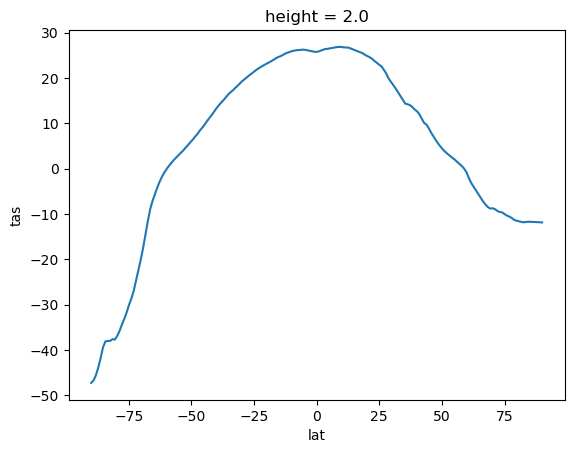

In [26]:
# weight by cell_area and take mean over (time, lon)
cell_area = cell_weight(ds, var)
ds.weighted(cell_area).mean(["lon", "time"])[var].plot()

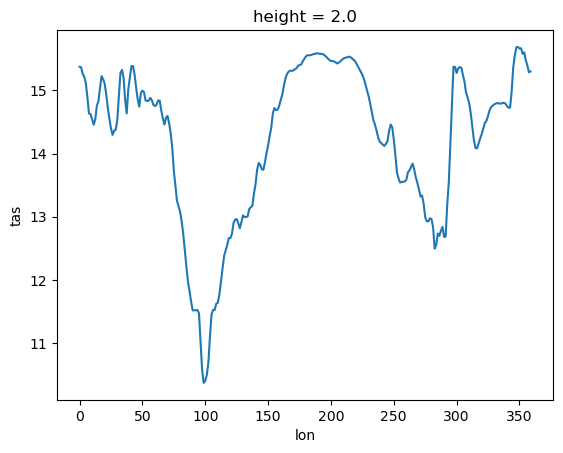

In [27]:
# weight by cell_area and take mean over (lon, lat)

cell_area = cell_weight(ds, var)
ds[var].weighted(cell_area).mean(["lat", "time"]).plot()

---

## Visualization

(`.plot`)

For more see https://xarray.pydata.org/en/stable/plotting.html and
https://xarray.pydata.org/en/stable/examples/visualization_gallery.html

We have seen very simple plots earlier. Xarray has some support for visualizing
3D and 4D datasets by presenting multiple facets (or panels or subplots) showing
variations across rows and/or columns.


In [28]:
import cartopy.crs as ccrs

Let's try to plot something: 
- First visualize the month of January, year 2010

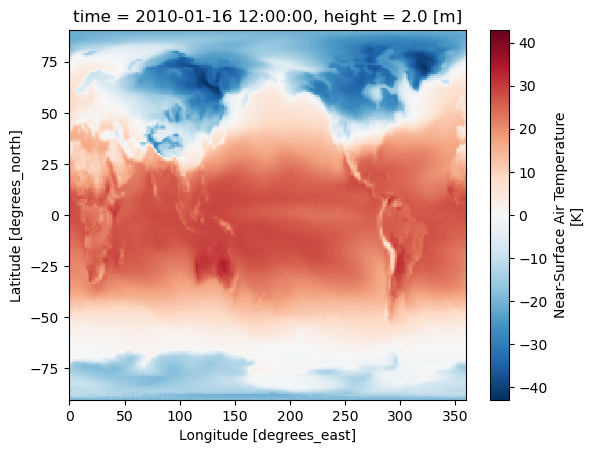

In [29]:
ds[var].sel(time='2010-01').plot()

Then let's plot the month of August for the same year. Which parts of the globe display the highest yearly temperature variation?

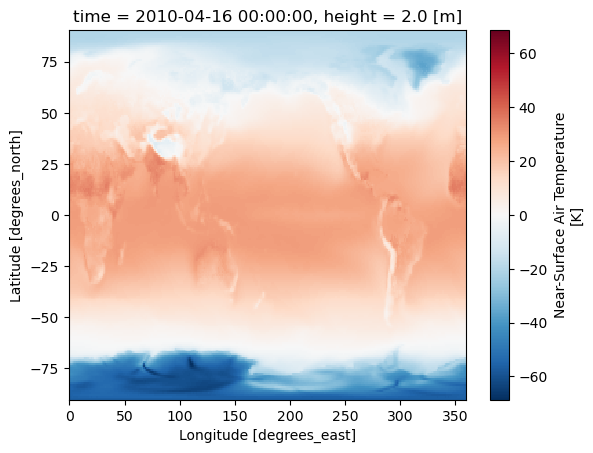

In [31]:
ds[var].sel(time='2010-04').plot()

Hint: we can quantitatively assess that by computing the Standard Deviation along the `time` dimension!

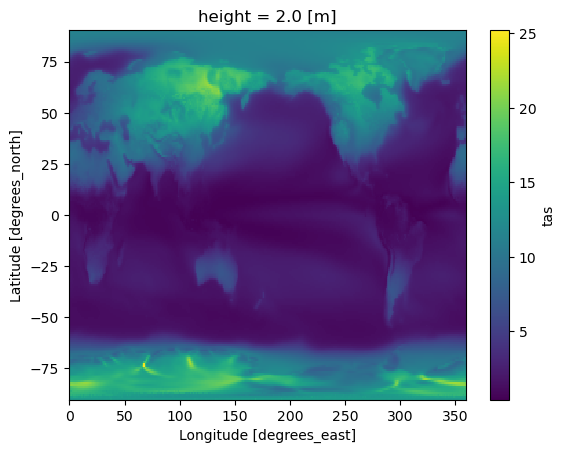

In [32]:
ds[var].std(dim="time").plot()

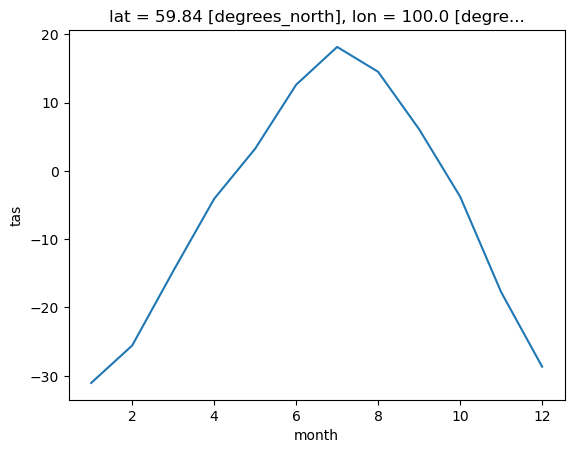

In [35]:
# Somewhere in Siberia

ds[var].sel(lon=100,lat=60,method='nearest').groupby('time.month').mean().plot()

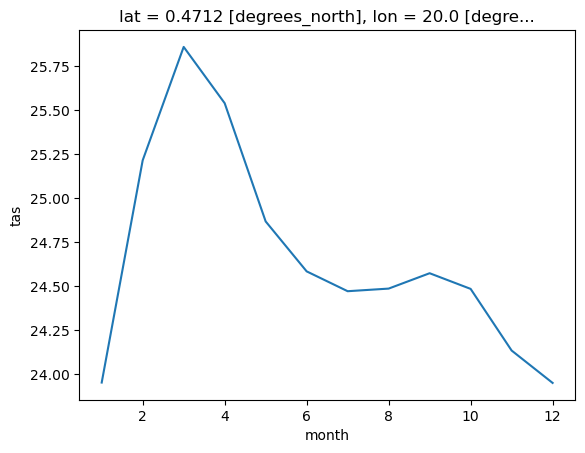

In [36]:
# Somewhere in Central Africa

ds[var].sel(lon=20,lat=0,method='nearest').groupby('time.month').mean().plot()

### Set Figure size and add coastlines

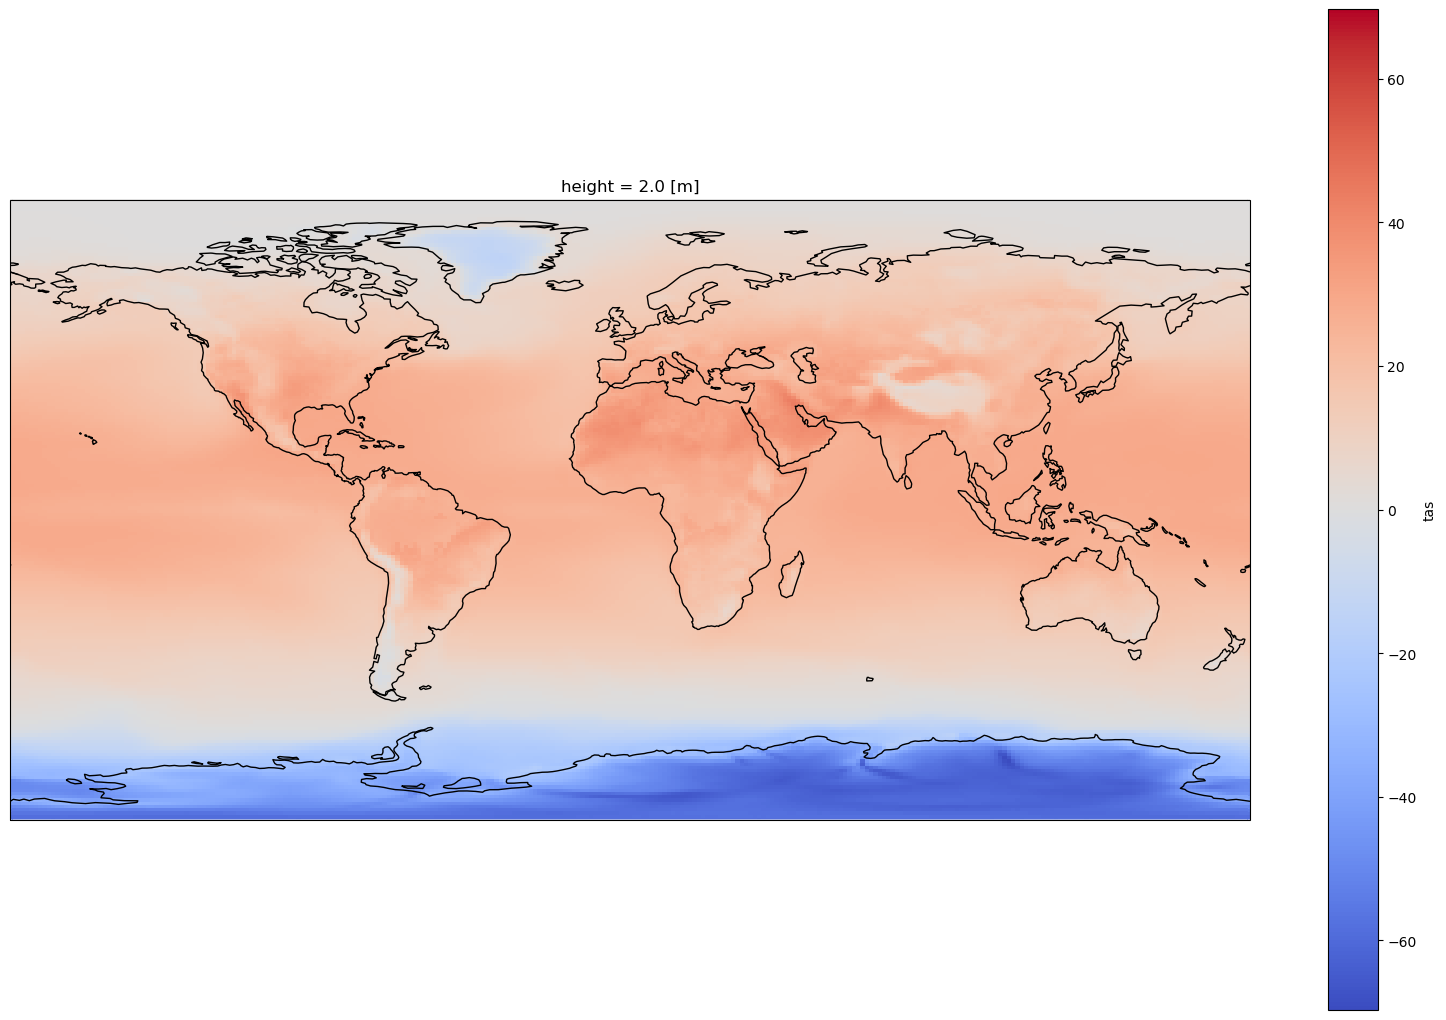

In [41]:
fig = plt.figure(1, figsize=[20,13])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()


# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
#ds[var].sel(time='2010-01').plot.pcolormesh(ax=ax, cmap='coolwarm')
lons = ds[var].lon
lats = ds[var].lat

#map = ax.pcolormesh(lons, lats, ds[var][0])
#map = ax.pcolormesh(lons, lats, ds[var].sel(time='2010-08').mean("time"))

ds[var].sel(time='2010-08').mean("time").plot.pcolormesh(ax=ax, cmap='coolwarm')

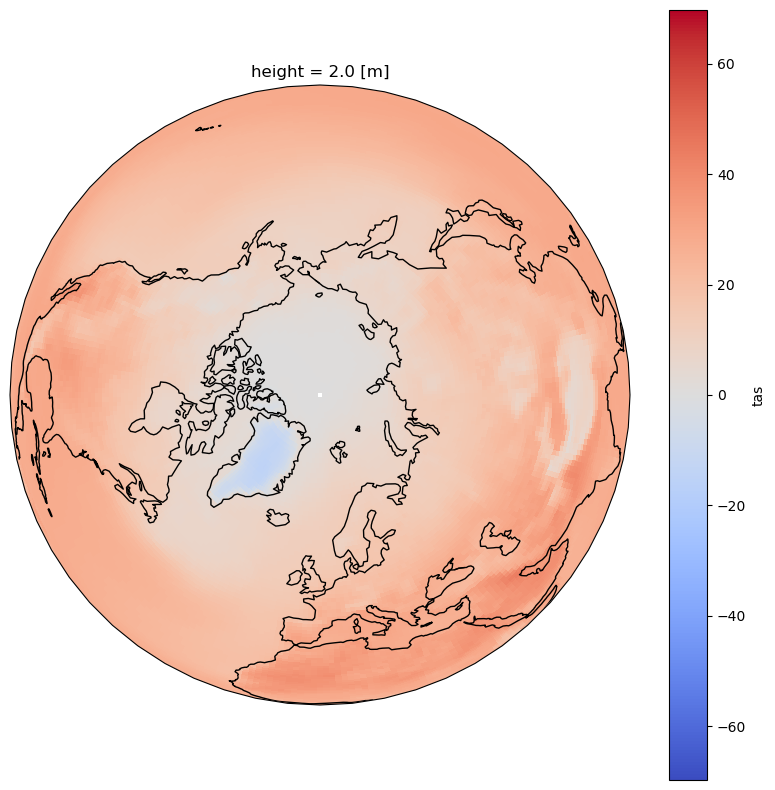

In [42]:
fig = plt.figure(1, figsize=[10,10])

# We're now plotting in Orthographic projection 
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()



ds[var].sel(time='2010-08').mean("time").plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
#plt.title(ds.attrs['variable_id'],ds.attrs['experiment_id'],ds.attrs['parent_source_id'], fontsize=18)

### Combine plots with different projections

Text(0, 0.5, '°C')

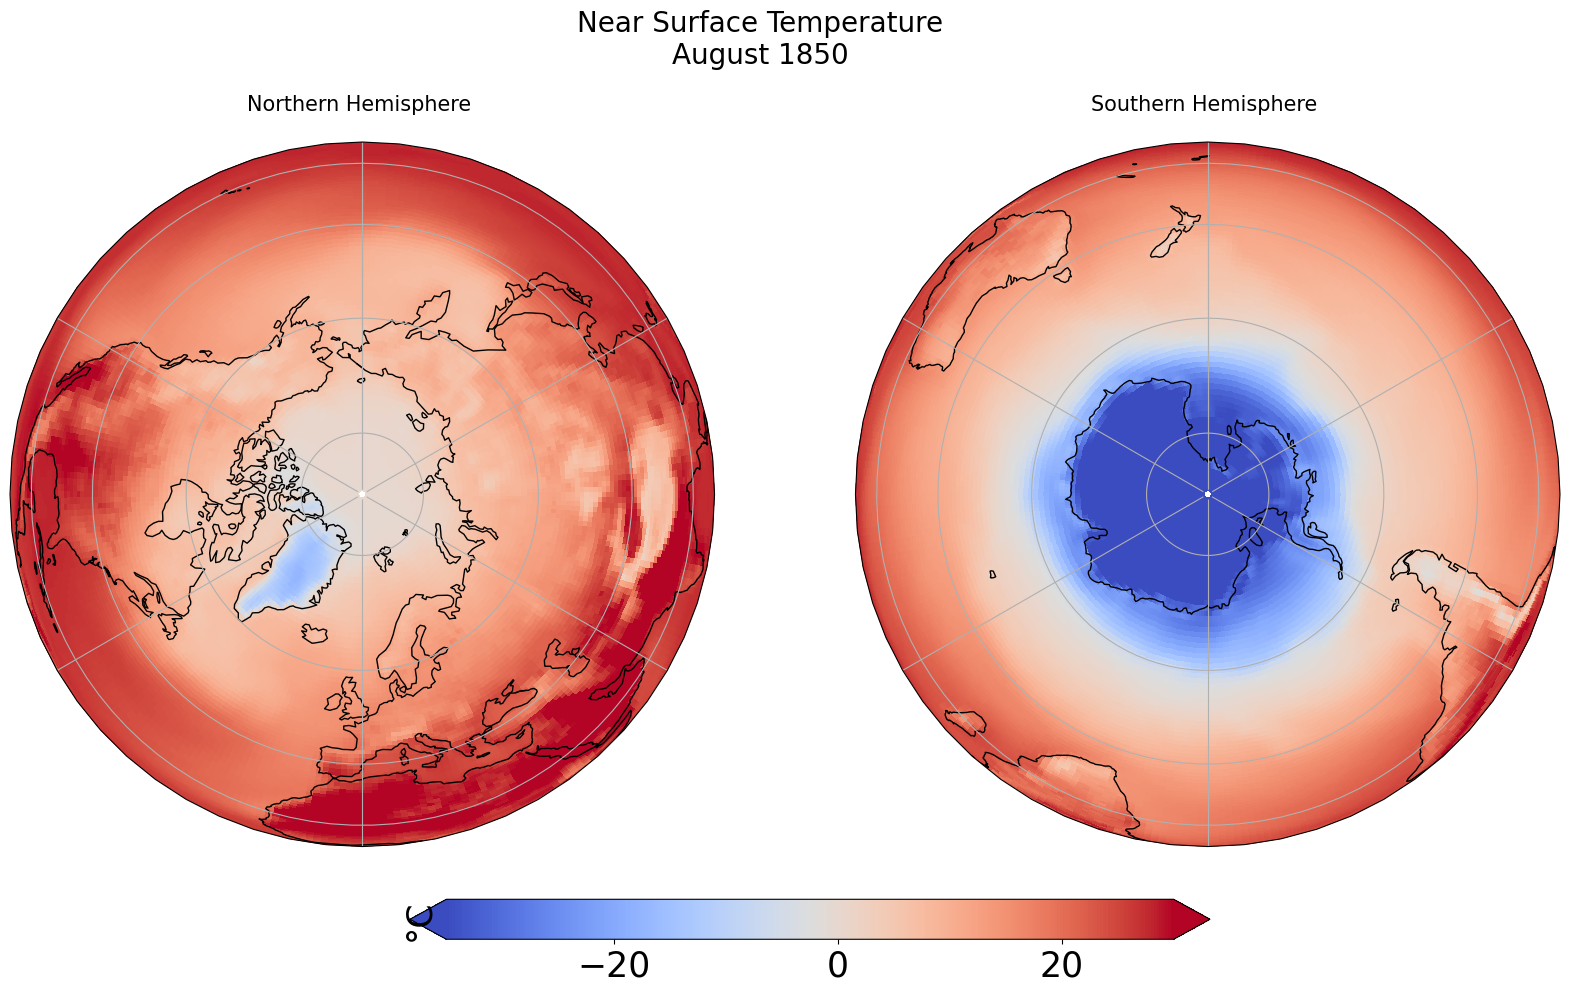

In [46]:
fig = plt.figure(1, figsize=[20,10])

# Fix extent
minval = -35
maxval = 30

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

tsel = "1850-08"
for ax,t in zip([ax1, ax2], ["Northern", "Southern"]):
    map = ds[var].sel(time=tsel).mean("time").plot(ax=ax, vmin=minval, vmax=maxval, 
                                           transform=ccrs.PlateCarree(), 
                                           cmap='coolwarm', 
                                           add_colorbar=False)
    ax.set_title(t + " Hemisphere \n" , fontsize=15)
    ax.coastlines()
    ax.gridlines()

# Title for both plots
fig.suptitle('Near Surface Temperature\n' + ds[var].sel(time=tsel).time.values[0].strftime("%B %Y"), fontsize=20)


cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('°C', fontsize=25)